In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ruptures as rpt
import seaborn as sns

In [2]:
health_df = pd.read_csv("../data/dataset.csv")

In [3]:
health_df.head()

,type,sourceName,unit,creationDate,startDate,endDate,value
0,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:53:45 +0900,2021-12-31 23:54:46 +0900,0.172
1,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:54:57 +0900,2021-12-31 23:55:48 +0900,0.239
2,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:55:58 +0900,2021-12-31 23:57:00 +0900,0.188
3,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:57:00 +0900,2021-12-31 23:57:10 +0900,0.067
4,HKQuantityTypeIdentifierHeartRate,Apple Watch,count/min,2022-01-01 00:00:03 +0900,2021-12-31 23:57:35 +0900,2021-12-31 23:57:35 +0900,79


In [4]:
health_df["type"].value_counts().keys()

Index(['HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierPhysicalEffort',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierAppleStandTime',
       'HKCategoryTypeIdentifierAppleStandHour',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierHeartRateVariabilitySDNN',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierStairDescentSpeed',
       'HKQuantityTypeIdentifierStairAscentSpeed',
       'HKQuantityTypeIdentifierRestingHeartRate',
   

# 騒音レベル

In [5]:
env_audio_df = health_df[health_df["type"] == "HKQuantityTypeIdentifierEnvironmentalAudioExposure"]
env_audio_df = env_audio_df[env_audio_df["unit"] == "dBASPL"]
env_audio_df["value"] = env_audio_df["value"].astype(float)

In [6]:
env_audio_df.head()

,type,sourceName,unit,creationDate,startDate,endDate,value
8,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-01-01 00:00:09 +0900,2021-12-31 23:50:38 +0900,2022-01-01 00:20:33 +0900,52.2509
48,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-01-01 00:23:35 +0900,2022-01-01 00:20:33 +0900,2022-01-01 00:50:33 +0900,46.4814
87,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-01-01 01:03:08 +0900,2022-01-01 00:50:33 +0900,2022-01-01 01:20:33 +0900,52.1532
116,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-01-01 01:30:14 +0900,2022-01-01 01:20:33 +0900,2022-01-01 01:50:33 +0900,34.5857
128,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-01-01 01:55:10 +0900,2022-01-01 01:50:33 +0900,2022-01-01 02:20:33 +0900,49.5986


##  基準値と比較してみる
- Ref: https://sumulie.com/blog/?p=758


In [7]:
# 普通 静かな事務所 (日常生活で望ましい範囲)
env_audio_df["value"].mean()

np.float64(52.318205312245404)

In [8]:
# 静か ささやき声 (静か)
env_audio_df["value"].min()

np.float64(30.7188)

In [9]:
# 極めてうるさい 地下鉄構内 (聴覚機能に異常をきたす)
env_audio_df["value"].max()

np.float64(102.167)

In [10]:
env_audio_df[env_audio_df["value"] >= 90]

,type,sourceName,unit,creationDate,startDate,endDate,value
5607,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-01-04 20:54:36 +0900,2022-01-04 20:51:51 +0900,2022-01-04 20:54:36 +0900,92.3939
360772,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-08-29 16:16:24 +0900,2022-08-29 16:16:13 +0900,2022-08-29 16:46:12 +0900,94.6805
387094,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-09-16 17:09:19 +0900,2022-09-16 17:08:43 +0900,2022-09-16 17:38:43 +0900,93.0970
389886,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-09-17 18:38:07 +0900,2022-09-17 18:33:32 +0900,2022-09-17 18:59:57 +0900,93.1711
389955,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-09-17 19:10:55 +0900,2022-09-17 18:59:57 +0900,2022-09-17 19:24:37 +0900,93.7642
390307,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-09-17 22:15:34 +0900,2022-09-17 22:08:12 +0900,2022-09-17 22:38:02 +0900,94.0950
455980,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-10-30 15:22:36 +0900,2022-10-30 15:19:16 +0900,2022-10-30 15:43:56 +0900,90.2298
502630,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-12-03 17:01:14 +0900,2022-12-03 17:00:44 +0900,2022-12-03 17:03:59 +0900,102.1670
524298,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-12-17 01:19:20 +0900,2022-12-17 01:11:59 +0900,2022-12-17 01:40:09 +0900,92.1537
524351,HKQuantityTypeIdentifierEnvironmentalAudioExpo...,Apple Watch,dBASPL,2022-12-17 01:43:55 +0900,2022-12-17 01:40:09 +0900,2022-12-17 02:10:09 +0900,90.1353


In [11]:
# 2023-02-04 VALIS LIVE
# 2023-05-14　ヴィクトリアマイル
# 2023-10-01 スプリンターズステークス
# 2024-03-24 高松宮記念
# 2024-03-26 飲み会

# エクササイズ

In [12]:
exercise_df = health_df[health_df["type"] == "HKQuantityTypeIdentifierAppleExerciseTime"]

In [13]:
# 1分間の間に運動があったかどうかで格納されている？
exercise_df["value"].value_counts()

value
1    25731
Name: count, dtype: int64

In [14]:
exercise_df["value"] = exercise_df["value"].astype(float)
exercise_df["date"] = pd.to_datetime(exercise_df["creationDate"])
exercise_df = exercise_df[["date", "value"]]
exercise_df = exercise_df.set_index("date")

/var/folders/4z/1p_57nbd6cs865rxxqy027kc0000gq/T/ipykernel_4634/3796782925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exercise_df["value"] = exercise_df["value"].astype(float)
/var/folders/4z/1p_57nbd6cs865rxxqy027kc0000gq/T/ipykernel_4634/3796782925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exercise_df["date"] = pd.to_datetime(exercise_df["creationDate"])


## 運動時間の合計
### 1日

value    27.199789
dtype: float64


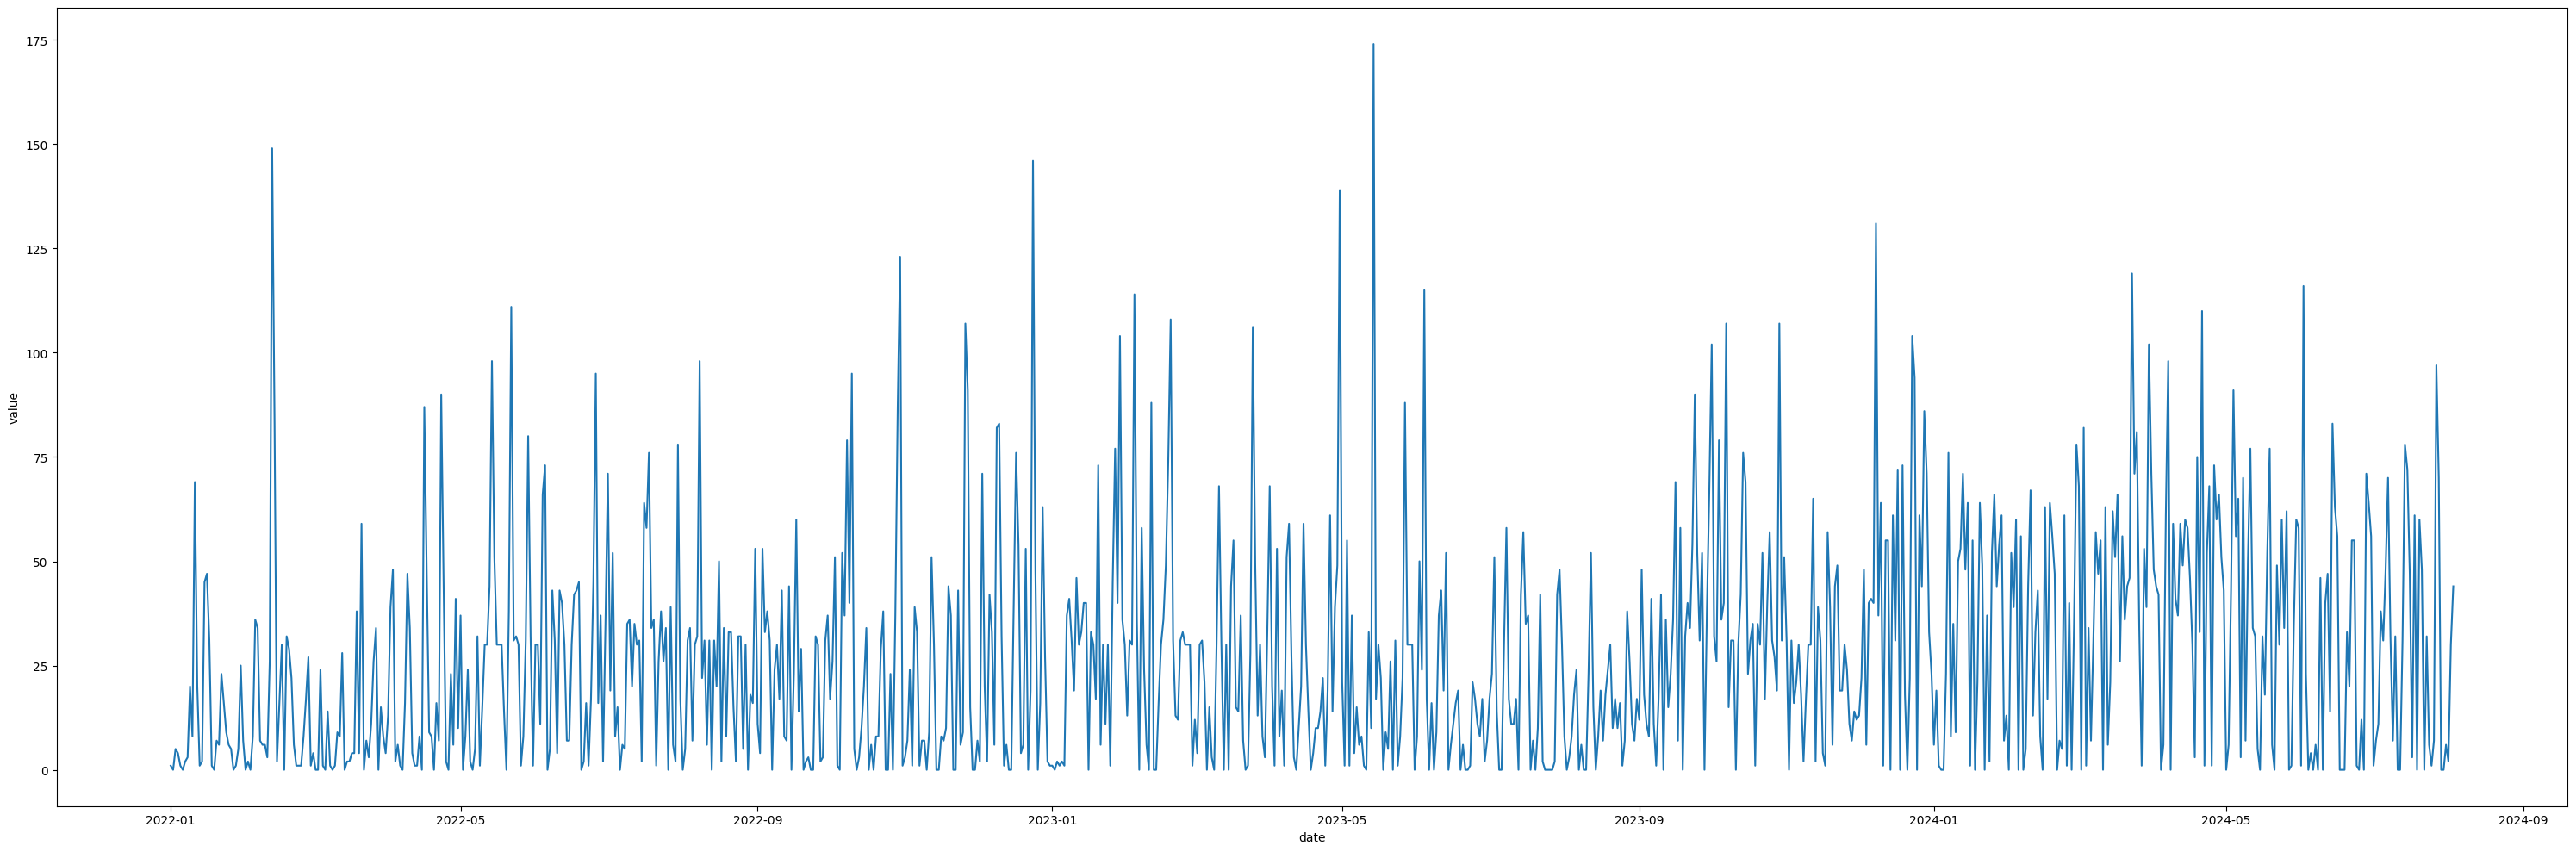

In [15]:
print(exercise_df.resample("D").sum().mean())
plt.figure(figsize=(30, 10))
sns.lineplot(data=exercise_df.resample("D").sum(), x="date", y="value")
plt.tight_layout()
plt.show()

### 1週間

value    189.198529
dtype: float64


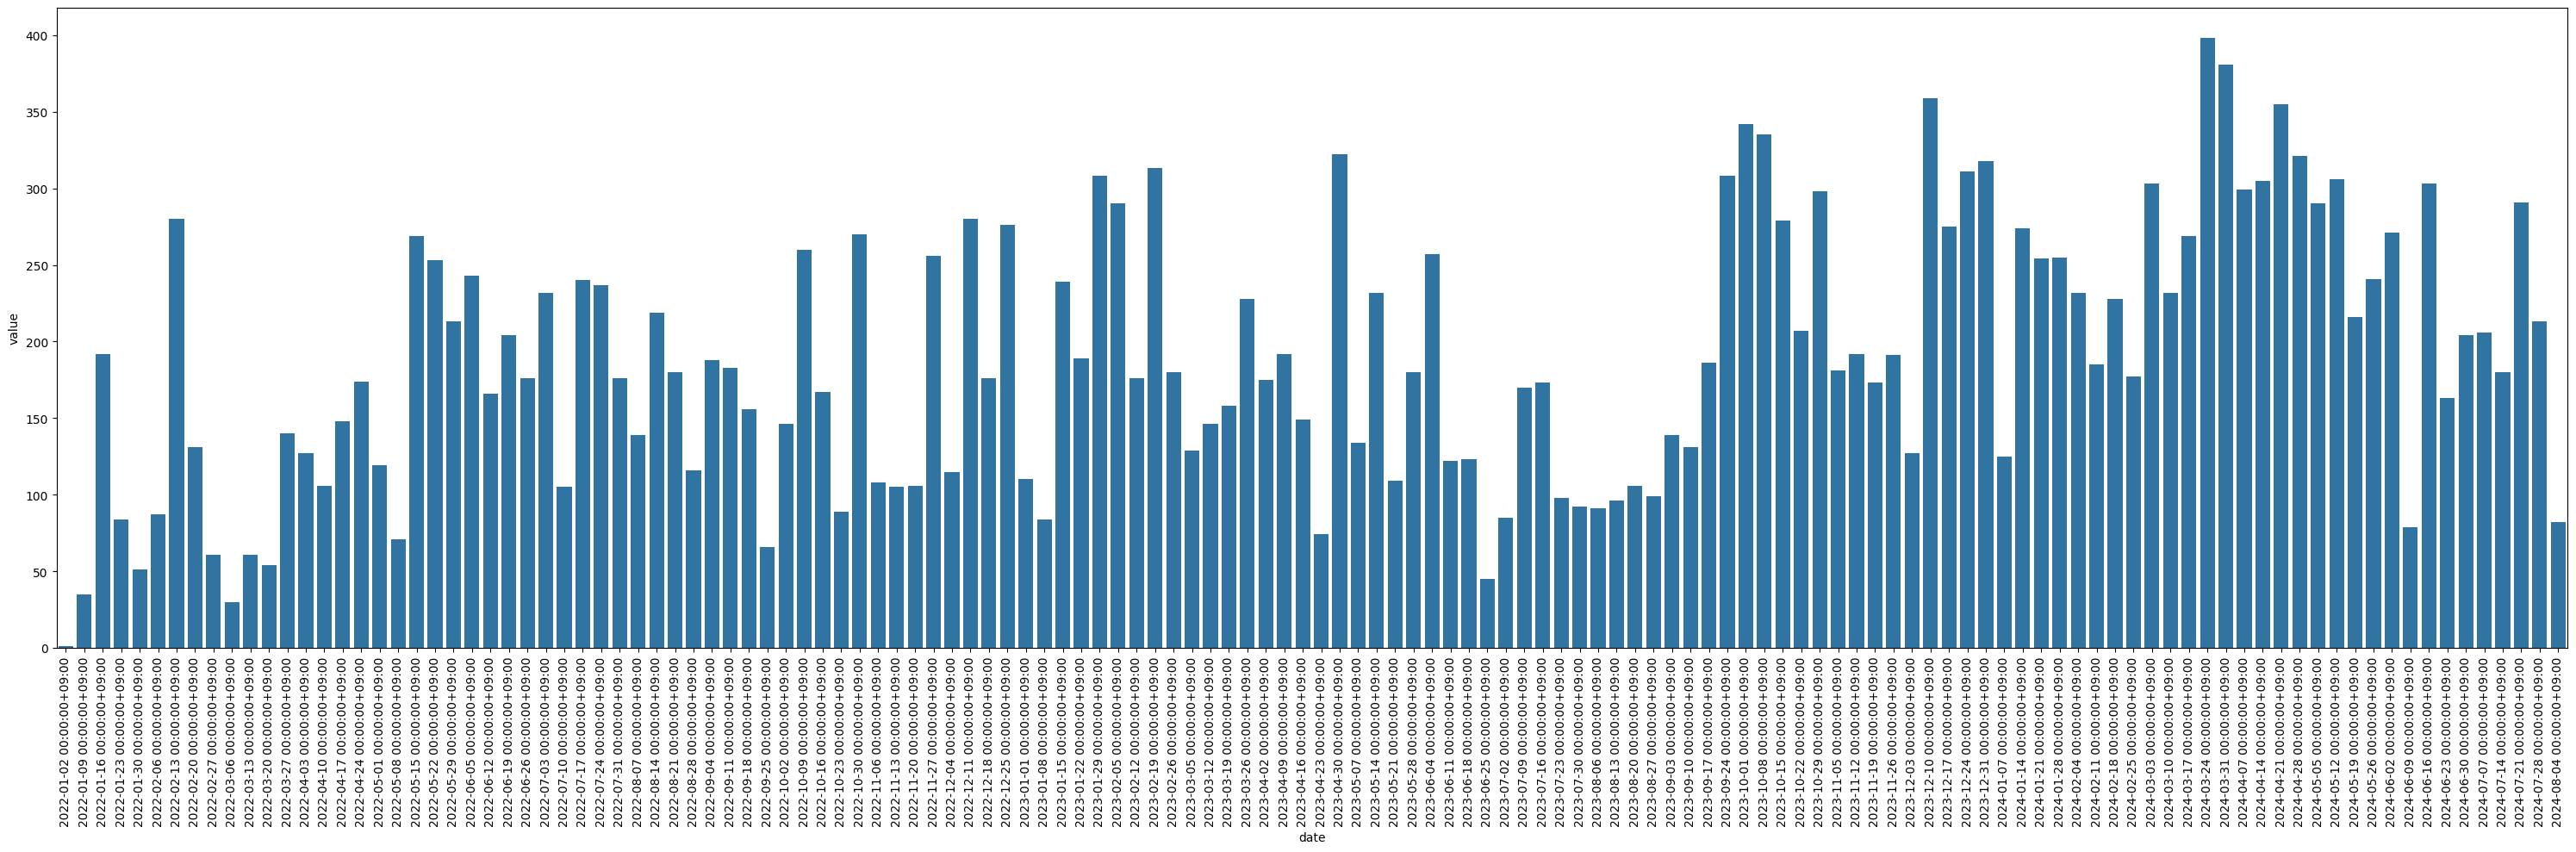

In [16]:
print(exercise_df.resample("W").sum().mean())
plt.figure(figsize=(30, 10))
sns.barplot(data=exercise_df.resample("W").sum(), x="date", y="value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 1ヶ月　

/var/folders/4z/1p_57nbd6cs865rxxqy027kc0000gq/T/ipykernel_4634/1910833878.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(exercise_df.resample("M").sum().mean())
/var/folders/4z/1p_57nbd6cs865rxxqy027kc0000gq/T/ipykernel_4634/1910833878.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.barplot(data=exercise_df.resample("M").sum(), x="date", y="value")


value    804.09375
dtype: float64


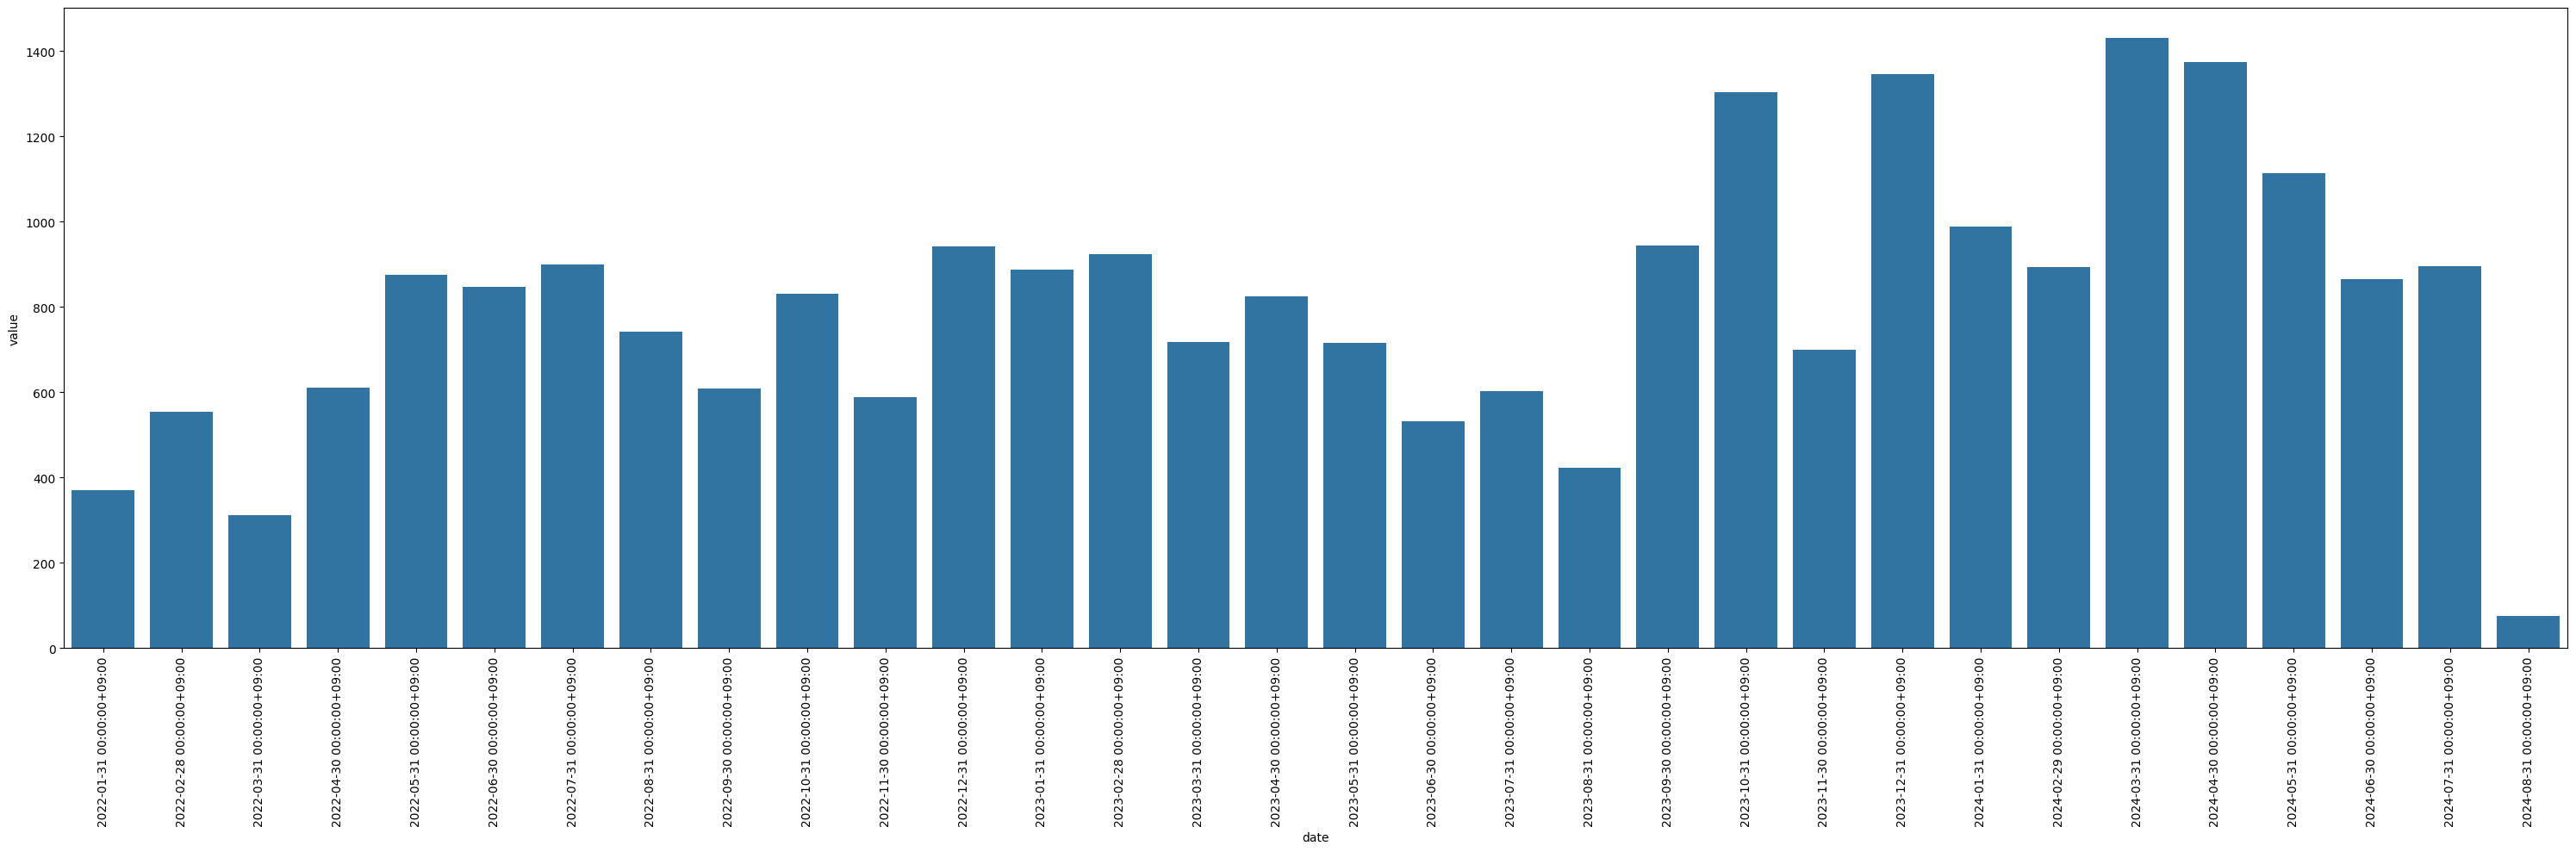

In [17]:
print(exercise_df.resample("M").sum().mean())
plt.figure(figsize=(30, 10))
sns.barplot(data=exercise_df.resample("M").sum(), x="date", y="value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 変化点を推定
- Ref: https://centre-borelli.github.io/ruptures-docs/

In [18]:
def create_train_data(train_df: pd.DataFrame, period: str) -> tuple[np.ndarray, np.ndarray]:
    period_list = ["D", "W", "M"]
    if period not in period_list:
        raise ValueError(f"period must be in {period_list}")

    train_df = train_df.resample(period).sum().reset_index()
    data = train_df["value"].values
    x_labels = train_df["date"].values

    return data, x_labels


def predict_change_points(data: np.ndarray, model: str = "l2", n_bkps: int = 4) -> list[int]:
    # アルゴリズム設定と学習
    algo = rpt.Dynp(model=model).fit(data)

    # 変化点の推定
    return algo.predict(n_bkps=n_bkps)


def plot_chage_points(result: list[int], data: np.ndarray, x_labels: np.ndarray, marker: str = None) -> None:
    # 変化点の可視化
    change_points = [x_labels[i - 1] for i in result]

    plt.figure(figsize=(12, 6))
    plt.plot(x_labels, data, marker=marker)

    # 変化点の日付のみをx軸に表示
    plt.xticks(change_points, rotation=90)

    for cp in change_points:
        plt.axvline(x=cp, color="r", linestyle="--", label="Change Point" if cp == change_points[0] else "")

    plt.xlabel("Change Points")
    plt.ylabel("Value")
    plt.title("Time Series with Change Points")
    plt.legend()
    plt.tight_layout()
    plt.show()


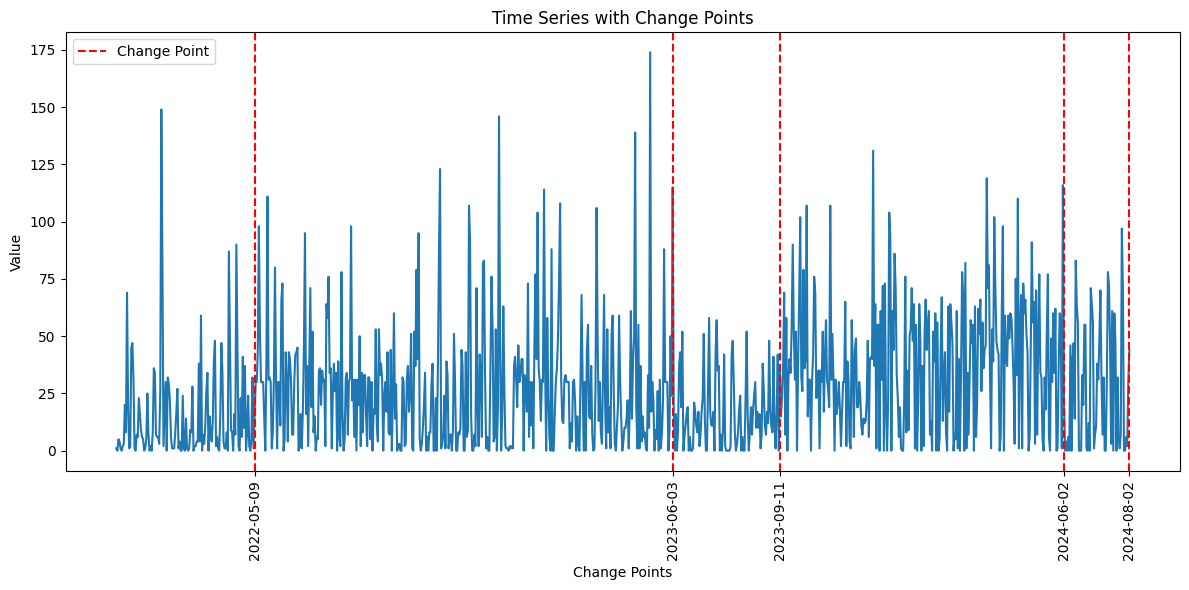

In [19]:
# Daily
data, x_labels = create_train_data(exercise_df, "D")
result = predict_change_points(data, model="l2", n_bkps=4)
plot_chage_points(result, data, x_labels)

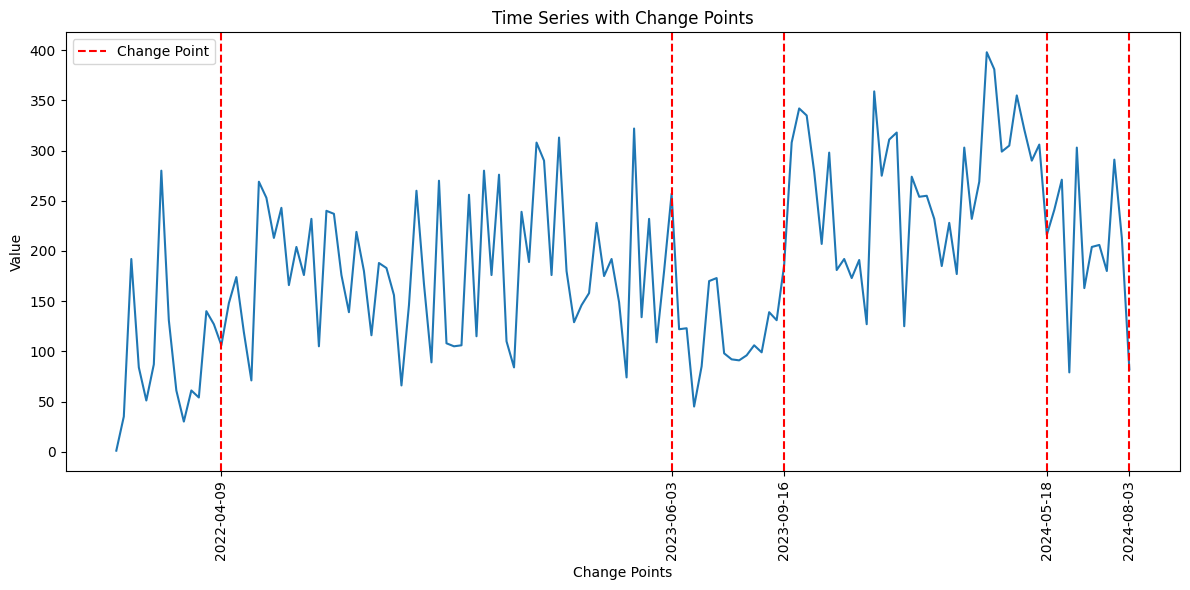

In [20]:
# Weekly
data, x_labels = create_train_data(exercise_df, "W")
result = predict_change_points(data, model="l2", n_bkps=4)
plot_chage_points(result, data, x_labels)

/var/folders/4z/1p_57nbd6cs865rxxqy027kc0000gq/T/ipykernel_4634/579821863.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_df = train_df.resample(period).sum().reset_index()


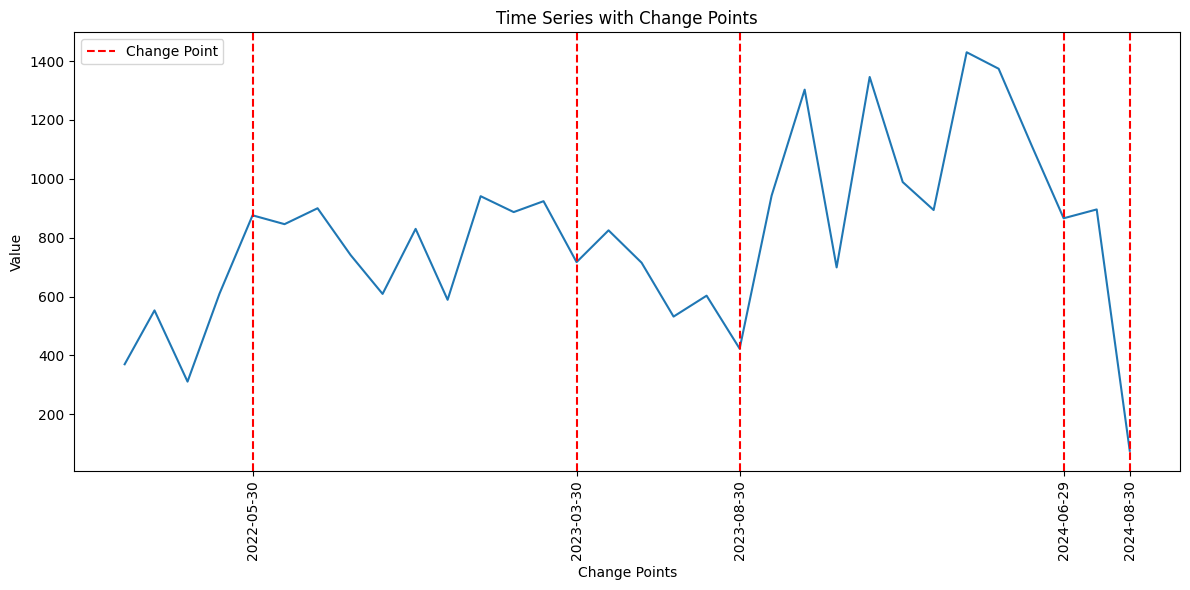

In [21]:
# Monthly
data, x_labels = create_train_data(exercise_df, "M")
result = predict_change_points(data, model="l2", n_bkps=4)
plot_chage_points(result, data, x_labels)

In [22]:
# 月毎の運動時間をcsvに出力
export_df = exercise_df.resample("M").sum().reset_index()
export_df = export_df.rename(columns={"value": "月毎運動合計時間（分）"})
export_df.to_csv("../data/exercise_time.csv", index=False)

/var/folders/4z/1p_57nbd6cs865rxxqy027kc0000gq/T/ipykernel_4634/2848108079.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  export_df = exercise_df.resample("M").sum().reset_index()
